In [1]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import numpy as np
from sklearn import datasets

In [2]:
iris= datasets.load_iris()
X= iris.data[:, :2]
y=iris.target

In [3]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.25, random_state=33)

In [4]:
#Standartize the features
scaler=preprocessing.StandardScaler().fit(X_train)
X_train=scaler.transform(X_train)
X_test= scaler.transform(X_test)

Text(0, 0.5, 'Sepal width')

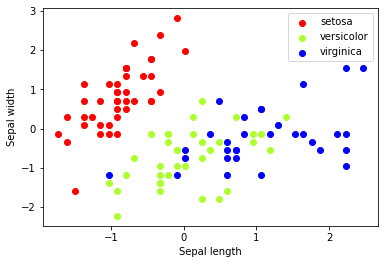

In [5]:
import matplotlib.pyplot as plt
colors=['red','greenyellow', 'blue']
for i in range(len(colors)):
    xs=X_train[:,0][y_train==i]
    ys=X_train[:,1][y_train==i]
    plt.scatter(xs, ys, c=colors[i])   
    
plt.legend(iris.target_names)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

In [7]:
from sklearn.linear_model import SGDClassifier

In [8]:
clf= SGDClassifier()
clf.fit(X_train, y_train)

SGDClassifier()

In [10]:
print (clf.coef_)

[[-26.46533651  16.19902312]
 [  5.89553654  -6.47808636]
 [ 12.97404263  -3.22933456]]


In [11]:
print (clf.intercept_)

[-12.22688454   0.25652322  -1.731097  ]


In [12]:
x_min, x_max= X_train[:, 0].min()-.5, X_train[:, 0].max()+.5

In [13]:
y_min, y_max=X_train[:,1].min()-.5, X_train[:,0].max()+.5

In [15]:
xs=np.arange(x_min, x_max, 0.5)

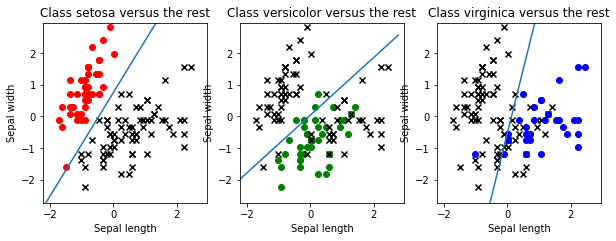

In [35]:
fig, axes = plt.subplots(1,3)
fig.set_size_inches(10,6)
for i in [0,1,2]:
    axes[i].set_aspect('equal')
    axes[i].set_title('Class '+ iris.target_names[i] + ' versus the rest')
    axes[i].set_xlabel('Sepal length')
    axes[i].set_ylabel('Sepal width')
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_ylim(y_min, y_max)
    plt.sca(axes[i])
    ys=(-clf.intercept_[i]-xs*clf.coef_[i,0])/clf.coef_[i,1]
    plt.plot(xs,ys)    
    for j in [0,1,2]:
        px = X_train[:, 0][y_train == j]
        py = X_train[:, 1][y_train == j]
        color = colors[j][0] if j==i else 'black'
        marker = 'o' if j==i else 'x'
        plt.scatter(px, py, c=color, marker=marker)     

plt.show()


In [37]:
scaler.transform([[4.7, 3.1]])
print(clf.decision_function(scaler.transform([[4.7, 3.1]])))
clf.predict(scaler.transform([[4.7, 3.1]]))


      
    

[[ 22.47486147  -7.71623141 -18.34476125]]


array([0])

In [40]:
from sklearn import metrics

In [41]:
y_train_pred= clf.predict(X_train)

In [42]:
print(metrics.accuracy_score(y_train_pred, y_train))

0.8571428571428571


In [43]:
y_pred=clf.predict(X_test)
print(metrics.accuracy_score(y_pred, y_test))

0.6578947368421053


In [45]:
print (metrics.classification_report(y_test, y_pred, target_names= iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       0.42      0.45      0.43        11
   virginica       0.67      0.63      0.65        19

    accuracy                           0.66        38
   macro avg       0.69      0.70      0.69        38
weighted avg       0.66      0.66      0.66        38



In [47]:
print("My name is Aigerim")
print("My NetID is: aigerim4")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Aigerim
My NetID is: aigerim4
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
